<a href="https://colab.research.google.com/github/GangadharGeddada-sys/EV-Data-Visualization/blob/main/EV_DATA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
data1=pd.read_csv("https://raw.githubusercontent.com/himanshuV09/Electric-Vehicle-Data-Visualization/refs/heads/main/EVDataset.csv")

In [111]:
data1.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [112]:
data1

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [113]:
data1["State"].value_counts().index

Index(['Maharashtra', 'Karnataka', 'Uttar Pradesh', 'Rajasthan', 'Gujarat',
       'West Bengal', 'Tamil Nadu', 'Odisha', 'Haryana', 'Kerala',
       'Chhattisgarh', 'Madhya Pradesh', 'Andhra Pradesh', 'Assam',
       'Uttarakhand', 'Himachal Pradesh', 'Punjab', 'Jharkhand', 'Bihar',
       'Jammu and Kashmir', 'Arunachal Pradesh', 'Goa', 'DNH and DD', 'Delhi',
       'Meghalaya', 'Puducherry', 'Manipur', 'Nagaland', 'Tripura', 'Mizoram',
       'Chandigarh', 'Sikkim', 'Andaman & Nicobar Island', 'Ladakh'],
      dtype='object', name='State')

In [114]:
data1.duplicated().sum()

0

In [115]:
data1.isnull().sum()


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

State                           Andaman & Nicobar Island  Andhra Pradesh  \
Vehicle_Class                                                              
ADAPTED VEHICLE                                        3             107   
AGRICULTURAL TRACTOR                                  11             121   
AMBULANCE                                             20             118   
ANIMAL AMBULANCE                                       0               5   
ARMOURED/SPECIALISED VEHICLE                           0               0   
...                                                  ...             ...   
TREE TRIMMING VEHICLE                                  0               0   
VEHICLE FITTED WITH COMPRESSOR                         0              58   
VEHICLE FITTED WITH GENERATOR                          0               1   
VEHICLE FITTED WITH RIG                                1             117   
X-RAY VAN                                              0               0   

State      

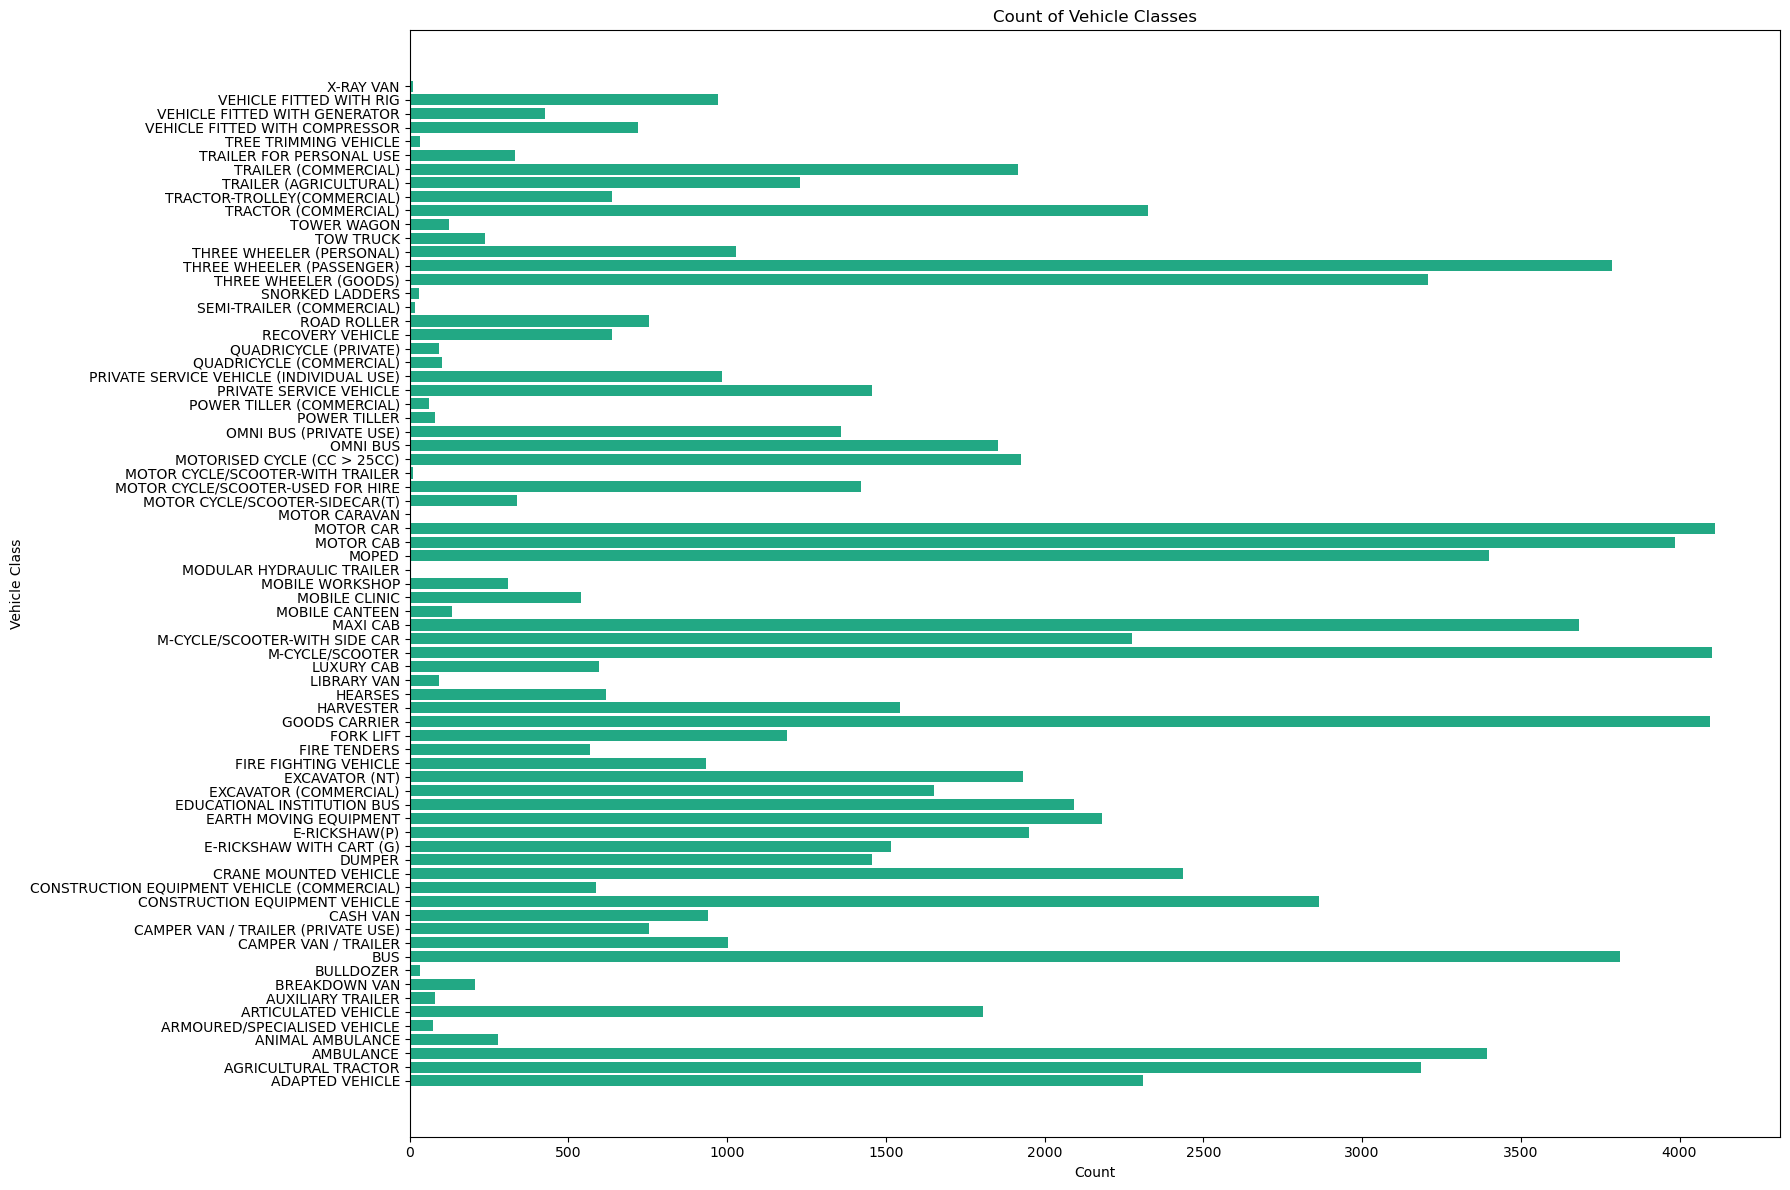

In [116]:
# Convert Vehicle_Class to numeric and drop NaNs
# data1["Vehicle_Class"] = pd.to_numeric(data1["Vehicle_Class"])
# print(data1)
data1 = data1.dropna(subset=["Vehicle_Class"])

# Count how many times each (Vehicle_Class, State) combinationappears
grouped_data = data1.groupby(["Vehicle_Class", "State"]).size().unstack(fill_value=0)
print(grouped_data)

# Sum across states to get total counts per Vehicle_Class
vehicle_counts = grouped_data.sum(axis=1)

# Plot
plt.figure(figsize=(18, 12))
plt.barh(vehicle_counts.index, vehicle_counts.values, color=plt.cm.viridis(0.6))
plt.xlabel("Count")
plt.ylabel("Vehicle Class")
plt.title("Count of Vehicle Classes")
plt.tight_layout()
plt.show()

### **Statewise of 2 and 3 wheeler vehicle**

In [117]:
subset = data1[["Vehicle_Category", "State"]].copy()
subset

,Vehicle_Category,State
0,Others,Andhra Pradesh
1,Others,Andhra Pradesh
2,Others,Andhra Pradesh
3,Others,Andhra Pradesh
4,Bus,Andhra Pradesh
...,...,...
96840,4-Wheelers,Andaman & Nicobar Island
96841,2-Wheelers,Andaman & Nicobar Island
96842,Bus,Andaman & Nicobar Island
96843,3-Wheelers,Andaman & Nicobar Island


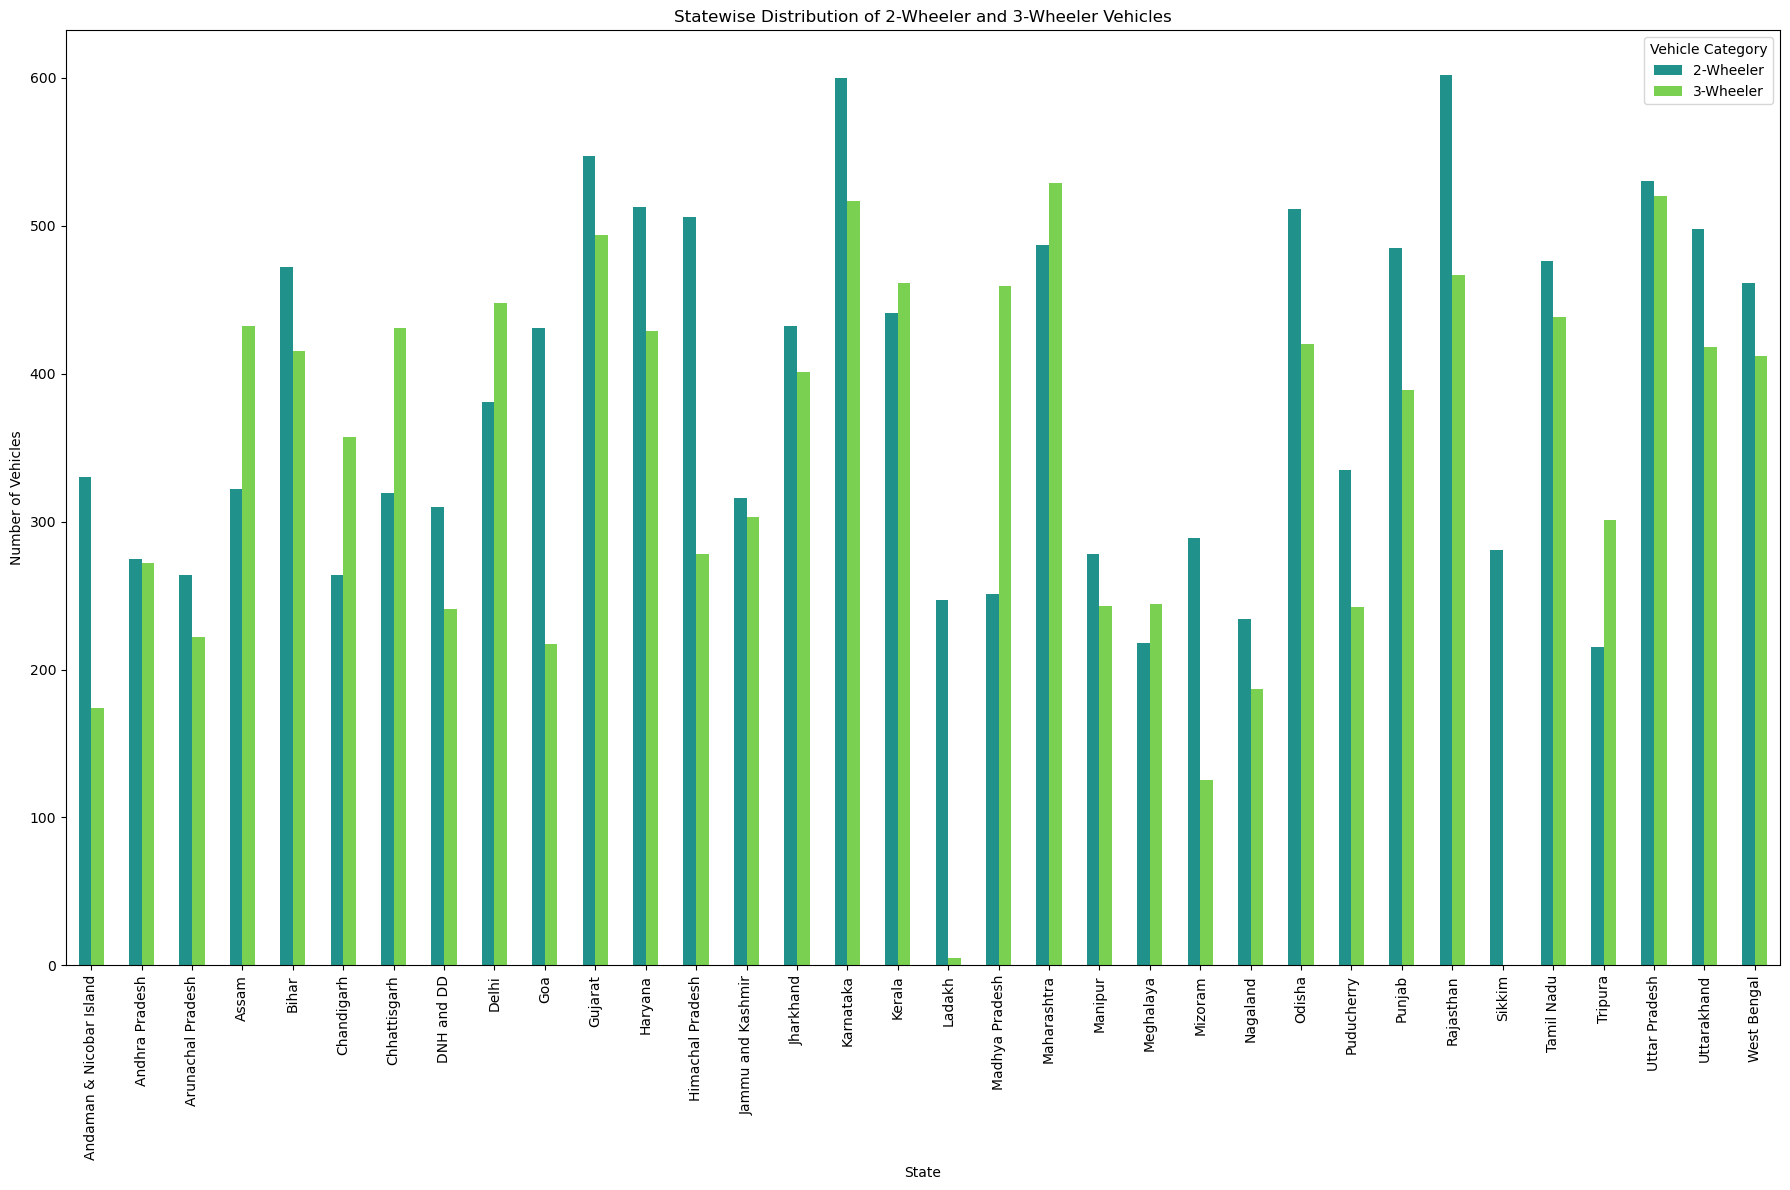

In [118]:

# Filter for 2-wheeler and 3-wheeler only
filtered_data = data1[data1["Vehicle_Category"].isin(["2-Wheelers", "3-Wheelers"])]

# Group by State and Vehicle_Class
grouped = filtered_data.groupby(["State", "Vehicle_Category"]).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', figsize=(18, 12), color=[plt.cm.viridis(0.5), plt.cm.viridis(0.8)])

plt.title("Statewise Distribution of 2-Wheeler and 3-Wheeler Vehicles")
plt.xlabel("State")
plt.ylabel("Number of Vehicles")
plt.legend(title="Vehicle Category", labels=["2-Wheeler", "3-Wheeler"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


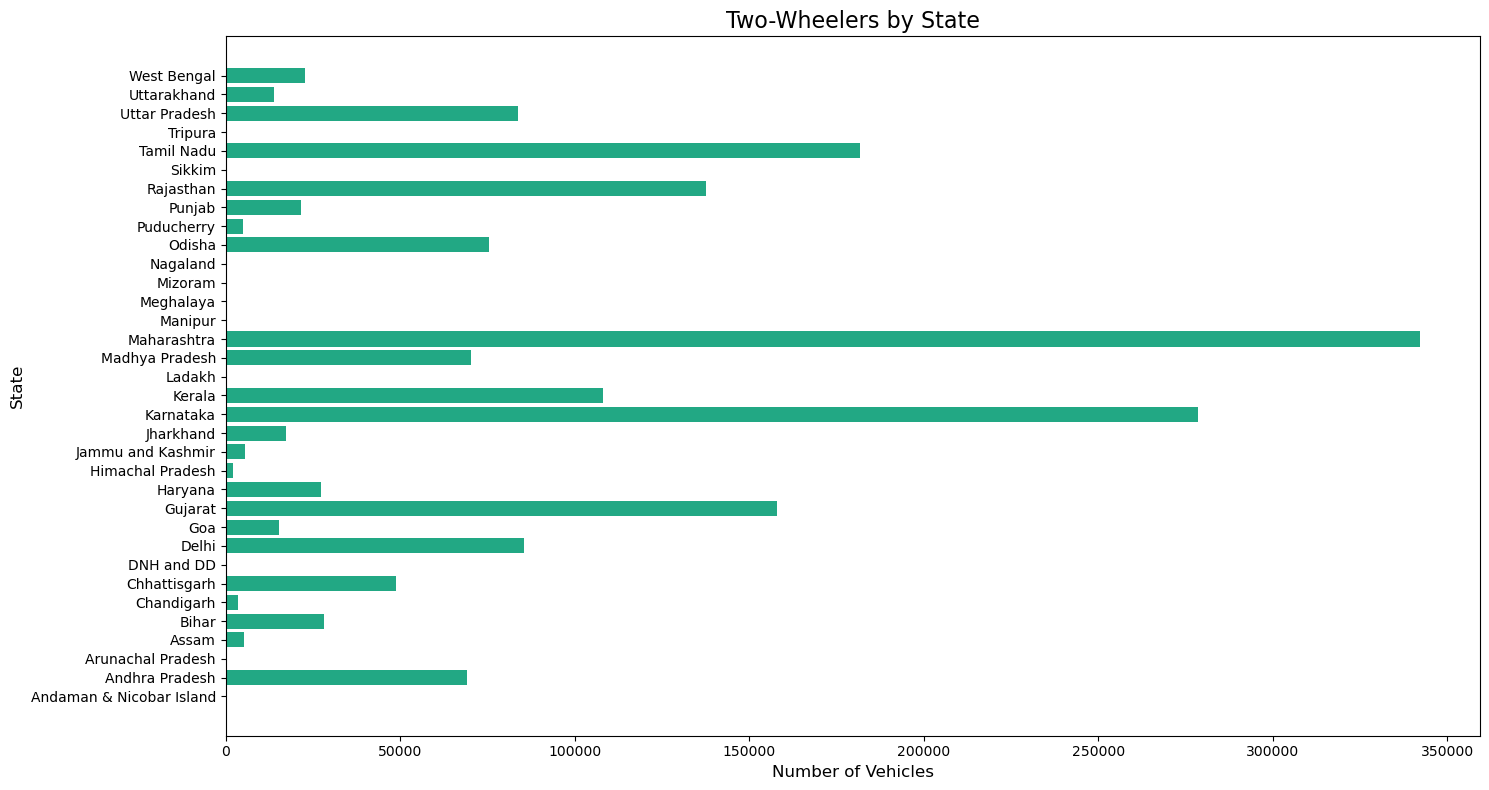

In [119]:
statewise_twoWhl = data1[data1["Vehicle_Category"]== "2-Wheelers"].groupby(["State"])["EV_Sales_Quantity"].sum()
statewise_twoWhl
plt.figure(figsize=(15, 8))
plt.barh(
    y=statewise_twoWhl.index,              # y-axis = State names
    width=statewise_twoWhl,  # x-axis = Number of vehicles (assuming 'Vehicle_Category' holds that count)
    color=plt.cm.viridis(0.6)      # optional: use a color from the 'viridis' colormap
)

plt.title("Two-Wheelers by State", fontsize=16)
plt.xlabel("Number of Vehicles", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

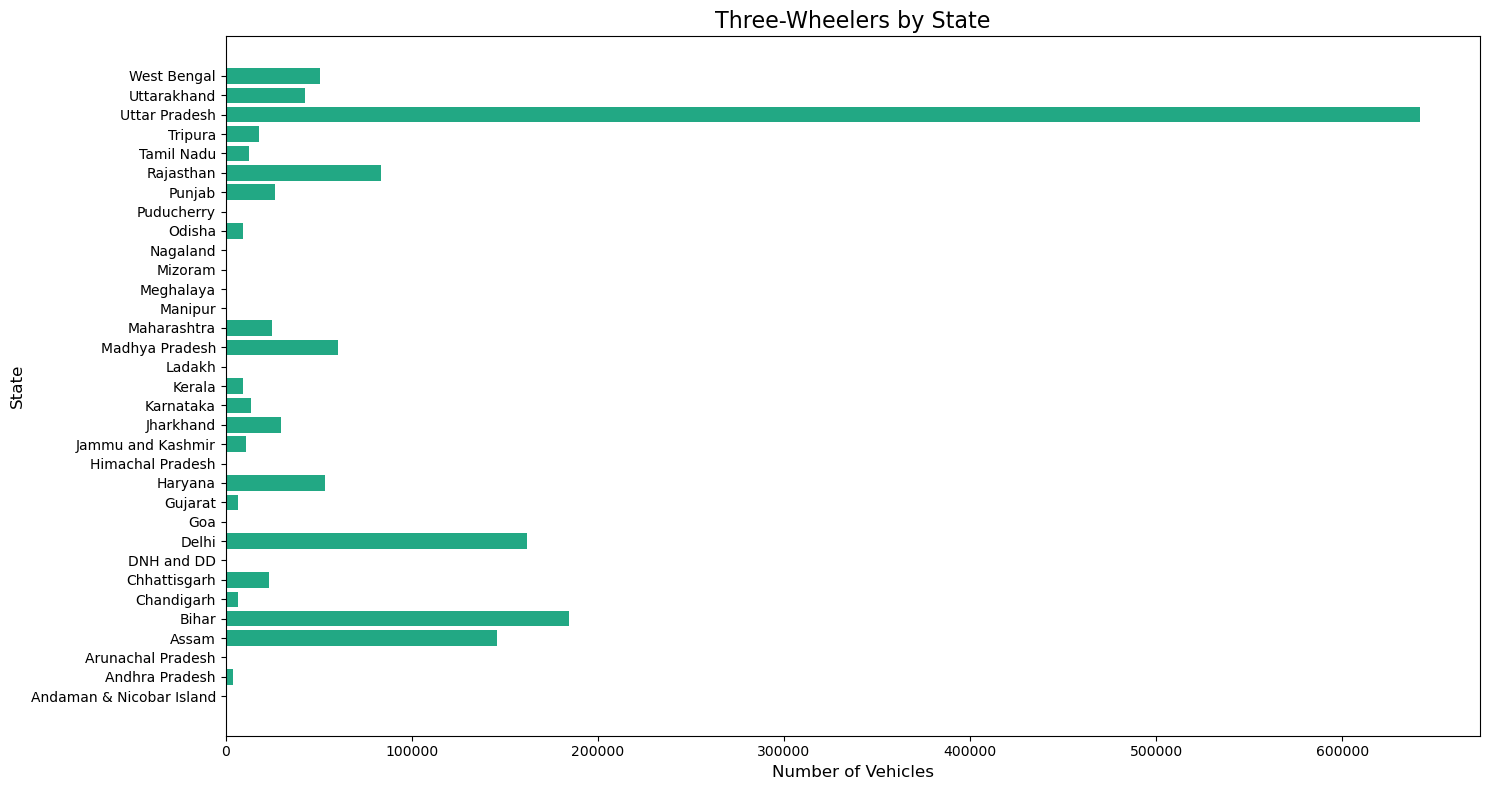

In [120]:
statewise_threeWhl = data1[data1["Vehicle_Category"]== "3-Wheelers"].groupby(["State"])["EV_Sales_Quantity"].sum()
statewise_threeWhl
plt.figure(figsize=(15, 8))
plt.barh(
    y=statewise_threeWhl.index,              # y-axis = State names
    width=statewise_threeWhl,  # x-axis = Number of vehicles (assuming 'Vehicle_Category' holds that count)
    color=plt.cm.viridis(0.6)      # optional: use a color from the 'viridis' colormap
)

plt.title("Three-Wheelers by State", fontsize=16)
plt.xlabel("Number of Vehicles", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

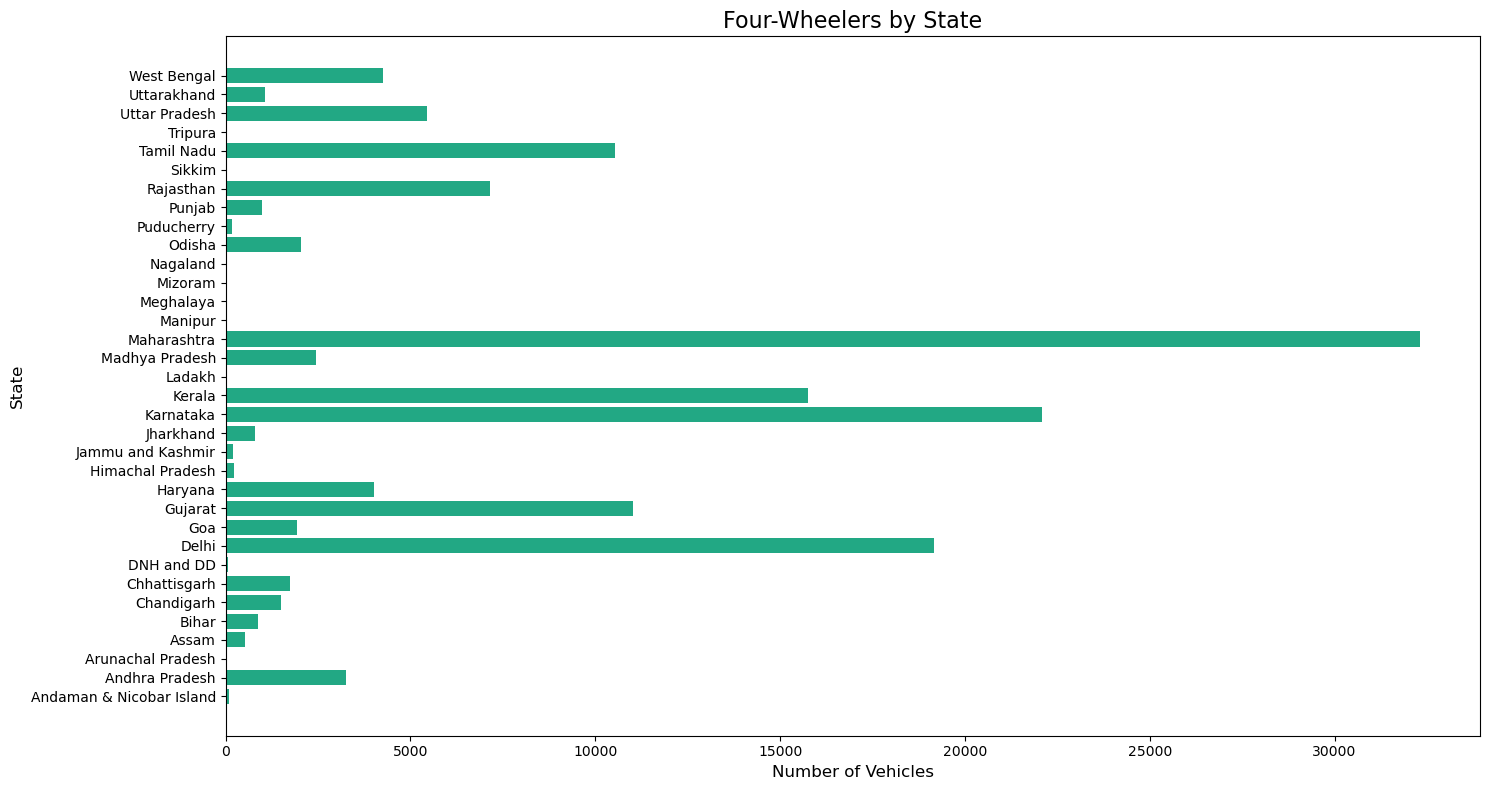

In [121]:
statewise_fourWhl = data1[data1["Vehicle_Category"]== "4-Wheelers"].groupby(["State"])["EV_Sales_Quantity"].sum()
statewise_fourWhl
plt.figure(figsize=(15, 8))
plt.barh(
    y=statewise_fourWhl.index,              # y-axis = State names
    width=statewise_fourWhl,  # x-axis = Number of vehicles (assuming 'Vehicle_Category' holds that count)
    color=plt.cm.viridis(0.6)      # optional: use a color from the 'viridis' colormap
)

plt.title("Four-Wheelers by State", fontsize=16)
plt.xlabel("Number of Vehicles", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

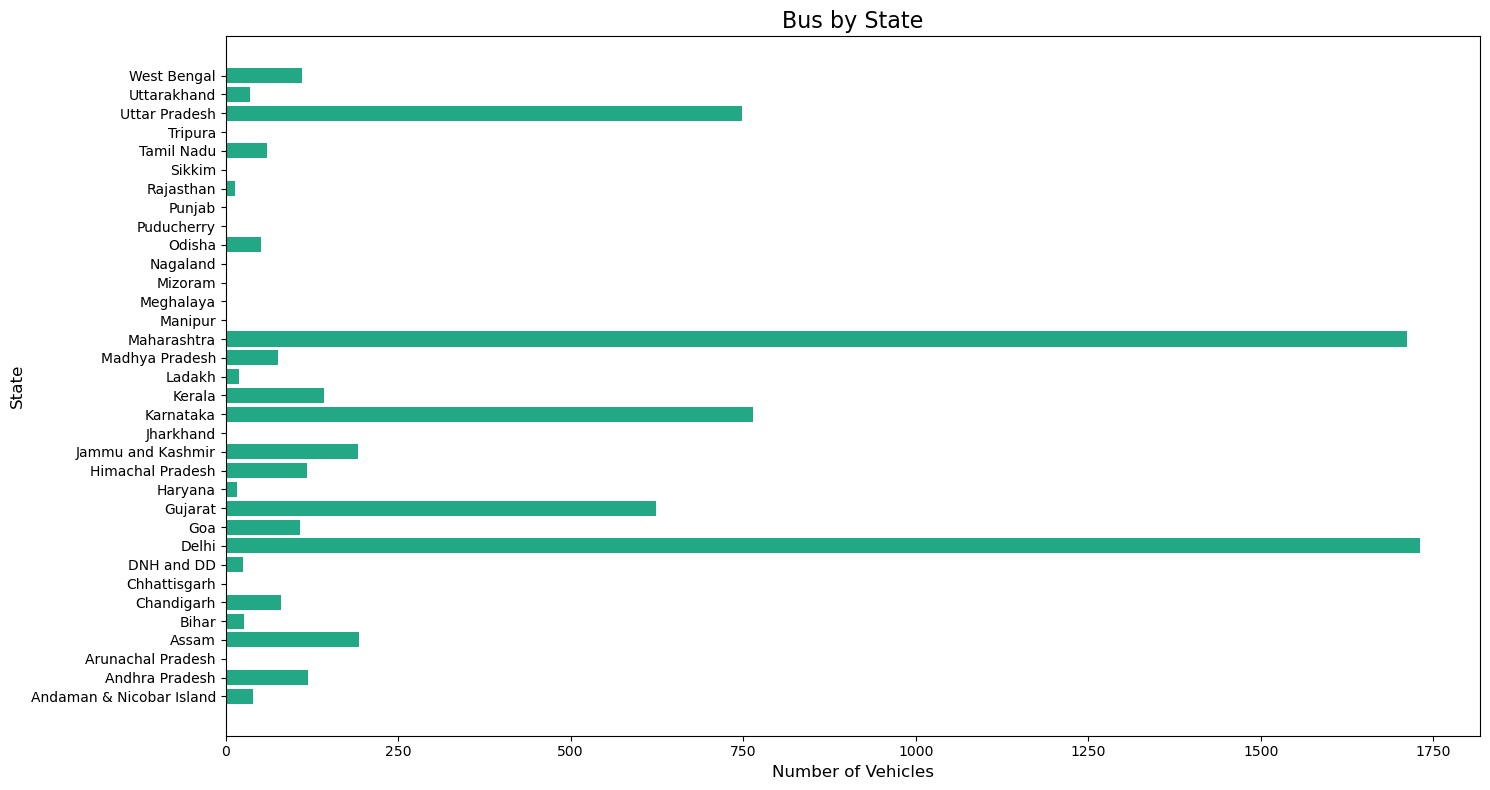

In [122]:
statewise_Bus = data1[data1["Vehicle_Category"]== "Bus"].groupby(["State"])["EV_Sales_Quantity"].sum()
statewise_Bus
plt.figure(figsize=(15, 8))
plt.barh(
    y=statewise_Bus.index,              # y-axis = State names
    width=statewise_Bus,  # x-axis = Number of vehicles (assuming 'Vehicle_Category' holds that count)
    color=plt.cm.viridis(0.6)      # optional: use a color from the 'viridis' colormap
)

plt.title("Bus by State", fontsize=16)
plt.xlabel("Number of Vehicles", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

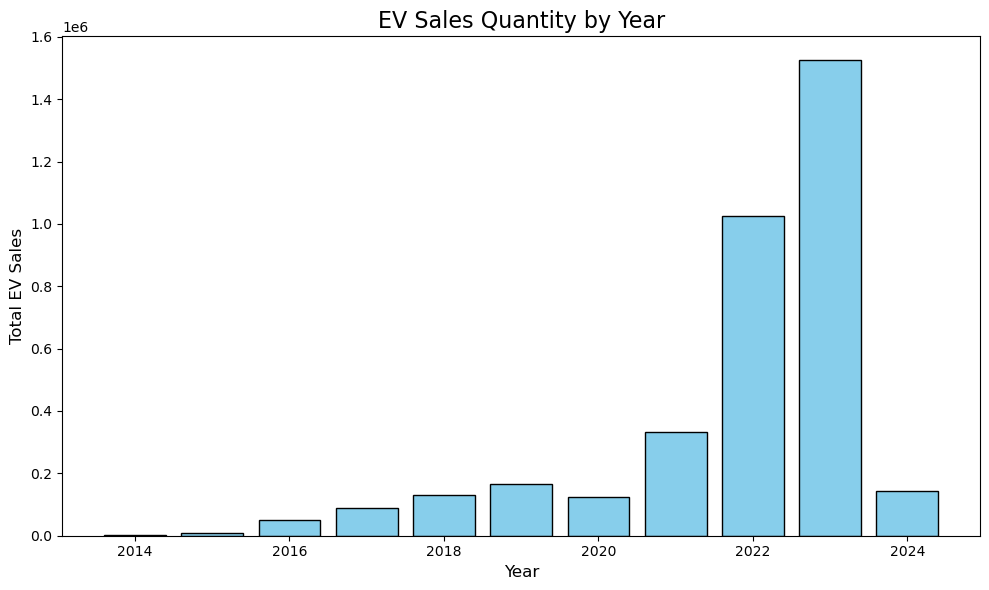

In [123]:
ev_sales_by_year = data1.groupby("Year")["EV_Sales_Quantity"].sum()

# Plot histogram (bar chart makes more sense for yearly data)
plt.figure(figsize=(10, 6))
plt.bar(ev_sales_by_year.index, ev_sales_by_year.values, color='skyblue', edgecolor='black')

plt.title("EV Sales Quantity by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total EV Sales", fontsize=12)
plt.tight_layout()
plt.show()

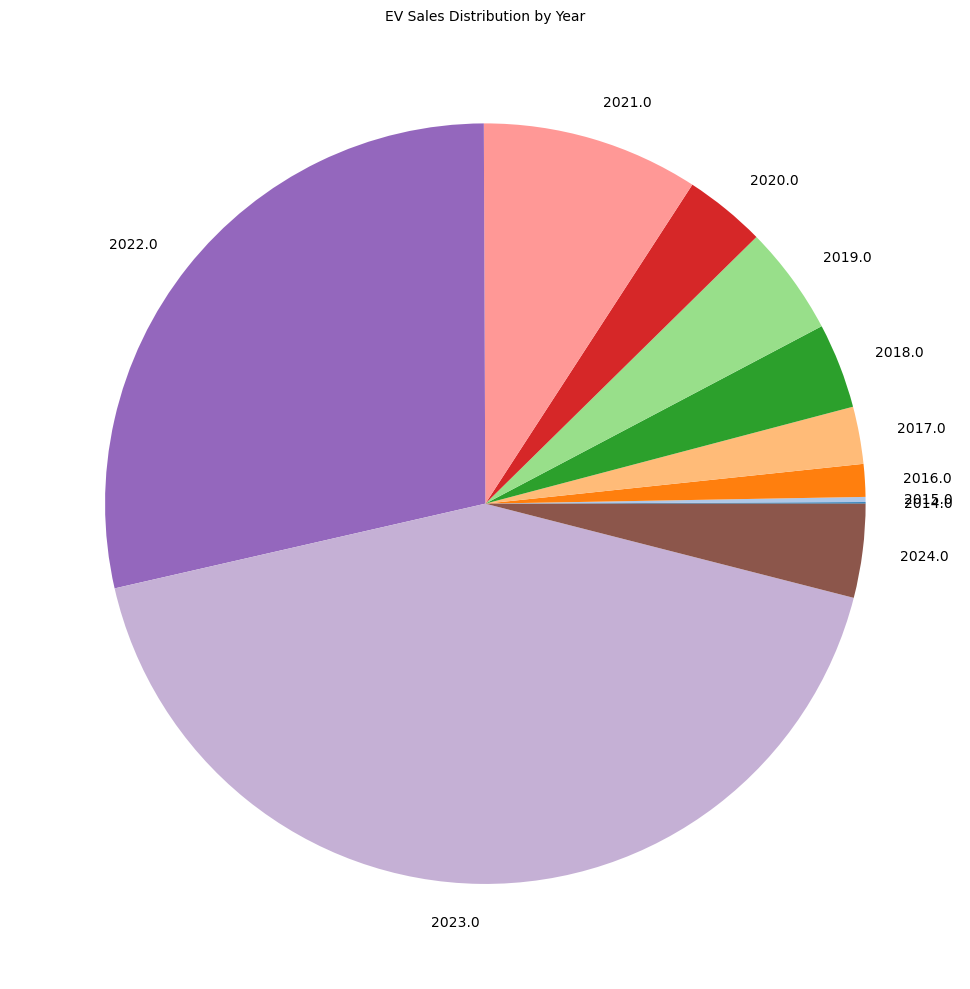

In [124]:
colors = plt.get_cmap('tab20').colors
plt.figure(figsize=(16,10))
plt.pie(
    ev_sales_by_year.values,
    labels=ev_sales_by_year.index,
    startangle=0,
    colors=colors[:len(ev_sales_by_year)]  # Use only as many colors as needed
)
plt.title("EV Sales Distribution by Year", fontsize=10)
plt.tight_layout()
plt.show()

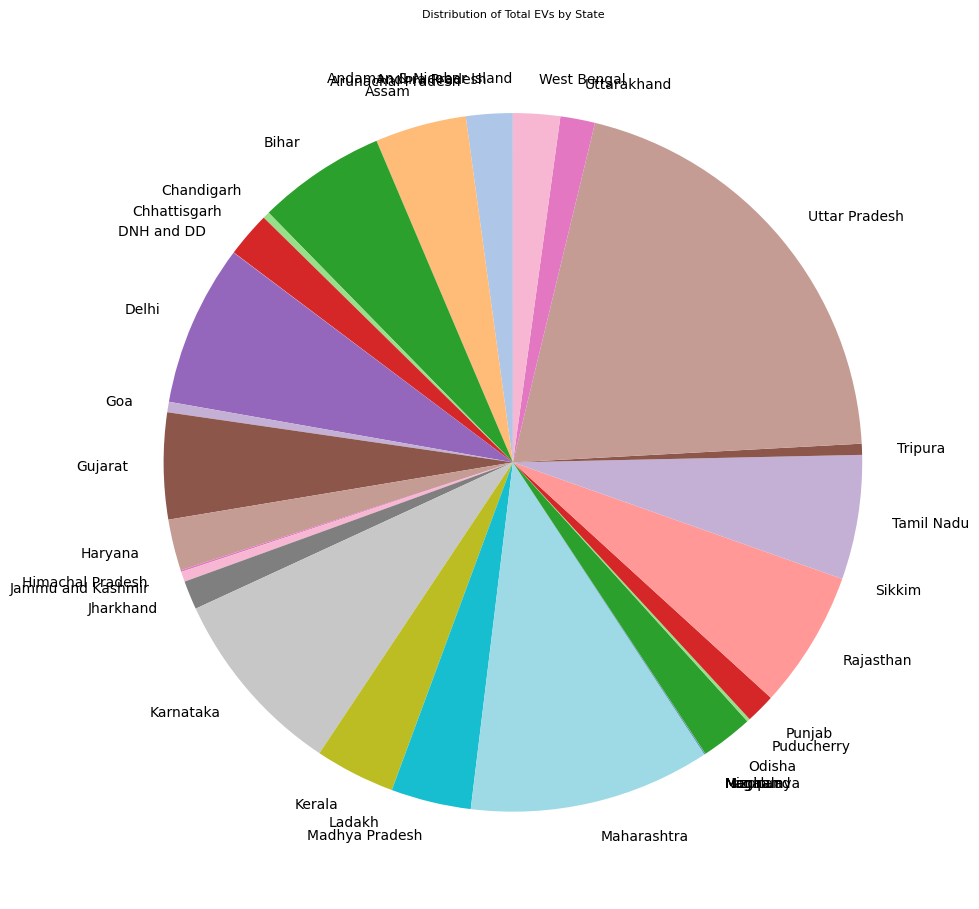

In [125]:
# Grouping the data
# state_ev_counts = data1.groupby('State')
state_ev_counts = data1.groupby('State')['EV_Sales_Quantity'].sum()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    state_ev_counts,
    labels=state_ev_counts.index,
    startangle=90,
    colors=plt.get_cmap('tab20').colors[:len(state_ev_counts)]  # Distinct colors
)
plt.title('Distribution of Total EVs by State', fontsize=8)
plt.tight_layout()
plt.show()


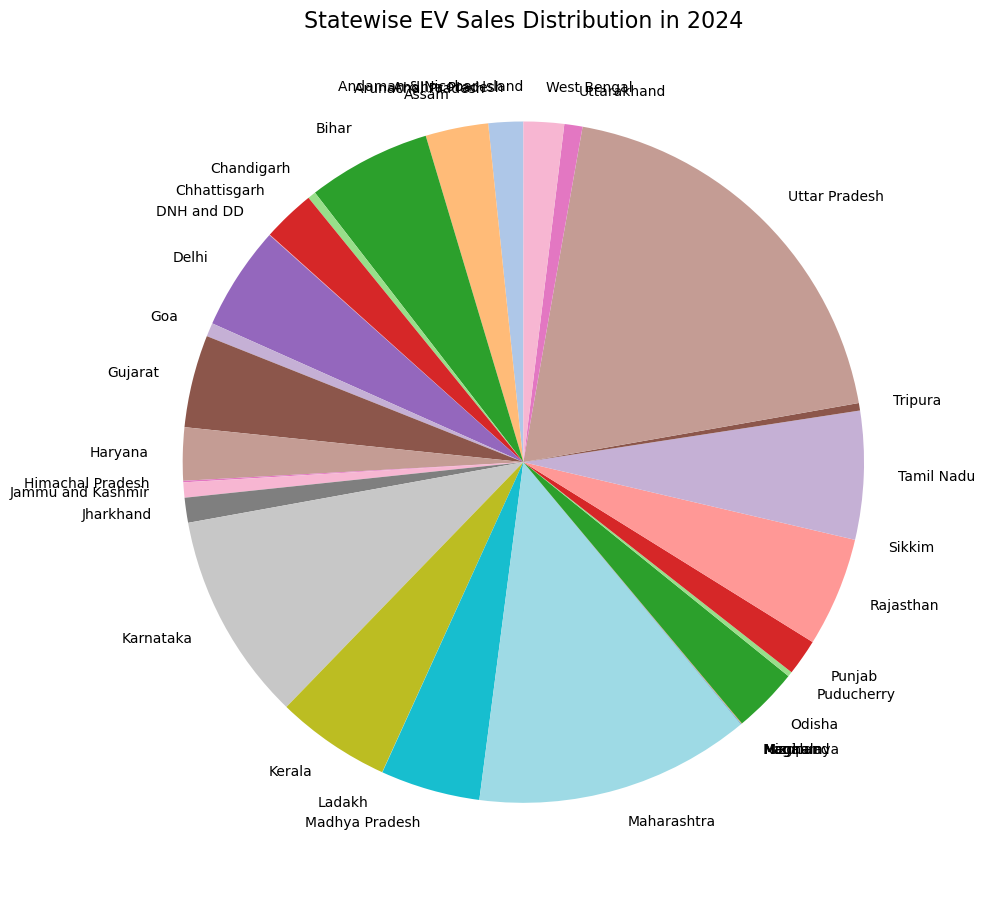

In [126]:
year = 2024
data_year = data1[data1['Year'] == year]

state_ev_counts = data_year.groupby('State')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(10, 10))
plt.pie(
    state_ev_counts,
    labels=state_ev_counts.index,
    startangle=90,
    colors=plt.get_cmap('tab20').colors[:len(state_ev_counts)]
)
plt.title(f'Statewise EV Sales Distribution in {year}', fontsize=16)
plt.tight_layout()
plt.show()


In [127]:
state_ev_counts = data1.groupby('State')['EV_Sales_Quantity'].sum()
top_10_states = state_ev_counts.sort_values(ascending=False).head(10)
print(top_10_states)

State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Bihar            213465.0
Tamil Nadu       206902.0
Gujarat          176713.0
Assam            151917.0
Kerala           133246.0
Name: EV_Sales_Quantity, dtype: float64


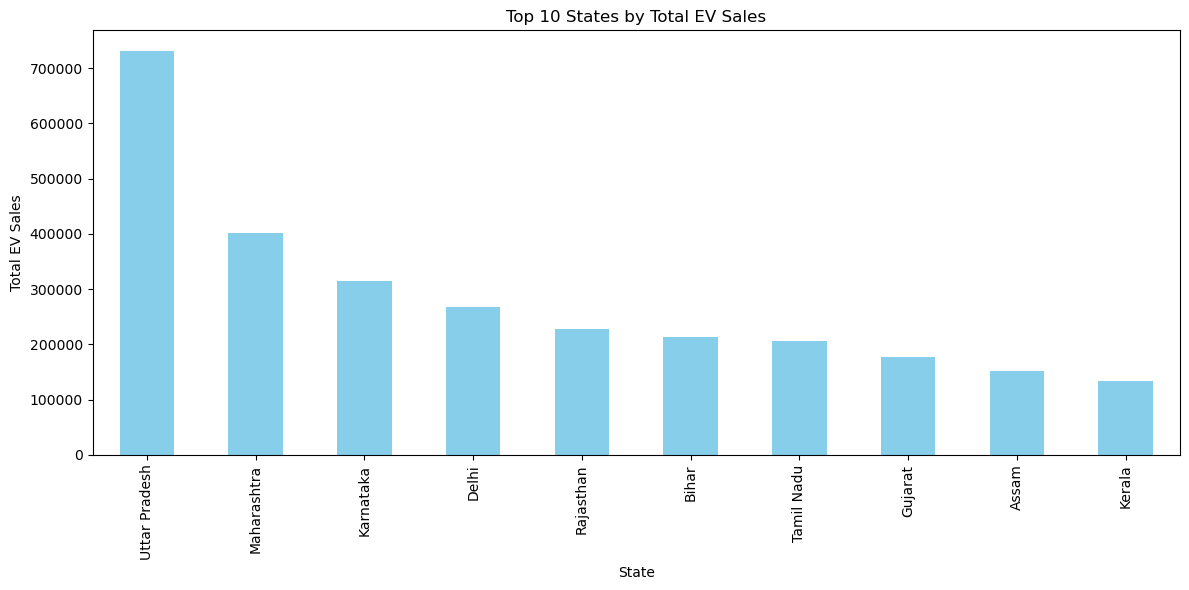

In [128]:
plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Total EV Sales')
plt.xlabel('State')
plt.ylabel('Total EV Sales')
plt.tight_layout()
plt.show()